In [29]:
from src.utils import *
import pandas as pd
from Bio.PDB import MMCIFParser
import numpy as np

CXCR4="MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYSIIFLTGIVGNGLVILVMGYQKKLRSMTDKYRLHLSVADLLFVITLPFWAVDAVANWYFGNFLCKAVHVIYTVNLYSSVLILAFISLDRYLAIVHATNSQRPRKLLAEKVVYVGVWIPALLLTIPDFIFANVSEADDRYICDRFYPNDLWVVVFQFQHIMVGLILPGIVILSCYCIIISKLSHSKGHQKRKALKTTVILILAFFACWLPYYIGISIDSFILLEIIKQGCEFENTVHKWISITEALAFFHCCLNPILYAFLGAKFKTSAQHALTSVSRGSSLKILSKGKRGGHSSVSTESESSSFHSS"
db_all=pd.read_csv("./Data/EPIX4_peptides.csv")

db_all['Sequence_Length'] = db_all['Sequence'].str.len()
db_all['IC50(nM)'] = db_all['IC50(nM)'].replace('>10000', '10000').astype(float) # assuming that >10k = inactive

sequence_length_counts = db_all['Sequence_Length'].value_counts().sort_values(ascending=False)
print(sequence_length_counts)

Sequence_Length
12    19
10    12
11     8
9      7
16     4
8      2
6      1
7      1
13     1
14     1
15     1
Name: count, dtype: int64


### peptides of length 12

In [21]:
db=db_all[db_all['Sequence_Length']==12]
db = db.sort_values(by='IC50(nM)')
db=db.reset_index(drop=True)
db

,PDB_NAME,Sequence,IC50(nM),PRODIGY,DFIRE,CP_PIE,Kdeep,RF-Score,PPI-Affiniy,Sequence_Length
0,JM#1,ILRWSKKVPCVS,385.0,-7.7,-26.2,1.0,-12.6,-9.8,-8.4,12
1,JM#10,IFRWSRKVPCVS,535.0,-8.4,-27.9,1.0,-14.1,-10.0,-8.5,12
2,JM#103,FVRWSKKVPCVS,584.0,-7.9,-27.1,1.0,-12.1,-9.9,-8.5,12
3,JM#105,IIRWSKKVPCVS,615.0,-7.8,-25.8,0.9,-12.5,-9.8,-8.5,12
4,JM#111,FLRWSRKLPCVS,732.0,-8.2,-28.7,1.2,-14.2,-10.1,-8.5,12
5,JM#112,PLRWSRKLPCVS,966.0,-7.7,-24.8,1.0,-14.5,-9.9,-8.6,12
6,JM#113,IIRWSRKLPCVS,1099.0,-7.6,-26.6,1.1,-12.9,-9.9,-8.5,12
7,JM#122,ILRWSRKLPSVS,3353.0,-8.2,-26.5,1.1,-13.3,-10.0,-8.2,12
8,JM#13,ILRWSRKMPCVS,NaN,-7.9,-27.0,1.1,-13.9,-10.0,-8.5,12
9,JM#146,IYRWSRKMPCLS,NaN,-8.4,-26.4,1.3,-14.2,-10.0,-8.3,12


### Identify Reference peptide

In [9]:
db['ESM2_initialLoss'] = db['Sequence'].apply(lambda peptide: compute_mlm_overall_withoutTheMaskedPos(CXCR4, peptide, [], []))
# db['ESM2_initialLoss'] = db['Peptide_Experimental'].apply(lambda peptide: compute_mlm_overall(HTRA1, peptide, [], []))
db

,PDB_NAME,Sequence,IC50(nM),PRODIGY,DFIRE,CP_PIE,Kdeep,RF-Score,PPI-Affiniy,Sequence_Length,ESM2_initialLoss
0,JM#21,ILRWSRKLPCVS,77.0,-7.9,-26.9,1.1,-13.7,-9.9,-8.5,12,15.724354
1,JM#122,ILRWSRKLPSVS,130.0,-8.2,-26.5,1.1,-13.3,-10.0,-8.2,12,15.754131
2,JM#151,IVRWSKKVPSVS,131.0,-8.0,-25.0,1.1,-12.4,-9.8,-8.2,12,15.768717
3,JM#23,ILRWSRKVPSVS,173.0,-7.7,-26.0,1.0,-13.0,-9.8,-8.2,12,15.758101
4,JM#19,ILRWSRKMPCFS,262.0,-8.2,-26.6,1.1,-13.5,-10.0,-8.5,12,15.697750
5,WSC02,IVRWSKKVPCVS,268.0,-8.0,-25.7,1.0,-11.7,-9.9,-8.5,12,15.741817
6,JM#13,ILRWSRKMPCVS,271.0,-7.9,-27.0,1.1,-13.9,-10.0,-8.5,12,15.713211
7,JM#20,ILRWSRKMPCMS,272.5,-8.3,-26.2,1.1,-13.3,-10.1,-8.6,12,15.671730
8,JM#10,IFRWSRKVPCVS,315.0,-8.4,-27.9,1.0,-14.1,-10.0,-8.5,12,15.735184
9,JM#18,ILRWSRKMPCLS,385.0,-7.3,-26.8,1.0,-14.1,-10.0,-8.4,12,15.709220


In [10]:
min_index = db['ESM2_initialLoss'].idxmin()
reference_peptide = db.loc[min_index, 'Sequence']
reference_peptide

'IYRWSRKMPCLS'

### Get the binding affinity 

In [11]:
def compute_results(row):
    peptide = row['Sequence']
    MDM2_positions = [] 
    pep_positions = np.array(find_differences(reference_peptide, peptide)) 
    print(reference_peptide, peptide, pep_positions)
    # return compute_mlm_overall(HTRA1, reference_peptide, HTRA_positions, pep_positions)
    return compute_mlm_overall_withoutTheMaskedPos(CXCR4, reference_peptide, MDM2_positions, pep_positions)

db['ESM2_ppi_score_overall'] = db.apply(compute_results, axis=1)
db

IYRWSRKMPCLS ILRWSRKLPCVS [ 1  7 10]
IYRWSRKMPCLS ILRWSRKLPSVS [ 1  7  9 10]
IYRWSRKMPCLS IVRWSKKVPSVS [ 1  5  7  9 10]
IYRWSRKMPCLS ILRWSRKVPSVS [ 1  7  9 10]
IYRWSRKMPCLS ILRWSRKMPCFS [ 1 10]
IYRWSRKMPCLS IVRWSKKVPCVS [ 1  5  7 10]
IYRWSRKMPCLS ILRWSRKMPCVS [ 1 10]
IYRWSRKMPCLS ILRWSRKMPCMS [ 1 10]
IYRWSRKMPCLS IFRWSRKVPCVS [ 1  7 10]
IYRWSRKMPCLS ILRWSRKMPCLS [1]
IYRWSRKMPCLS IVRWSHKVPCVS [ 1  5  7 10]
IYRWSRKMPCLS IYRWSRKMPCLS []
IYRWSRKMPCLS ILRWSHKVPCVS [ 1  5  7 10]
IYRWSRKMPCLS ILRWSKKVPCVS [ 1  5  7 10]
IYRWSRKMPCLS IIRWSKKVPCVS [ 1  5  7 10]
IYRWSRKMPCLS IIRWSRKLPCVS [ 1  7 10]
IYRWSRKMPCLS FLRWSRKLPCVS [ 0  1  7 10]
IYRWSRKMPCLS PLRWSRKLPCVS [ 0  1  7 10]
IYRWSRKMPCLS FVRWSKKVPCVS [ 0  1  5  7 10]


,PDB_NAME,Sequence,IC50(nM),PRODIGY,DFIRE,CP_PIE,Kdeep,RF-Score,PPI-Affiniy,Sequence_Length,ESM2_initialLoss,ESM2_ppi_score_overall
0,JM#21,ILRWSRKLPCVS,77.0,-7.9,-26.9,1.1,-13.7,-9.9,-8.5,12,15.724354,15.726362
1,JM#122,ILRWSRKLPSVS,130.0,-8.2,-26.5,1.1,-13.3,-10.0,-8.2,12,15.754131,15.741119
2,JM#151,IVRWSKKVPSVS,131.0,-8.0,-25.0,1.1,-12.4,-9.8,-8.2,12,15.768717,15.774164
3,JM#23,ILRWSRKVPSVS,173.0,-7.7,-26.0,1.0,-13.0,-9.8,-8.2,12,15.758101,15.741119
4,JM#19,ILRWSRKMPCFS,262.0,-8.2,-26.6,1.1,-13.5,-10.0,-8.5,12,15.697750,15.709060
5,WSC02,IVRWSKKVPCVS,268.0,-8.0,-25.7,1.0,-11.7,-9.9,-8.5,12,15.741817,15.747563
6,JM#13,ILRWSRKMPCVS,271.0,-7.9,-27.0,1.1,-13.9,-10.0,-8.5,12,15.713211,15.709060
7,JM#20,ILRWSRKMPCMS,272.5,-8.3,-26.2,1.1,-13.3,-10.1,-8.6,12,15.671730,15.709060
8,JM#10,IFRWSRKVPCVS,315.0,-8.4,-27.9,1.0,-14.1,-10.0,-8.5,12,15.735184,15.726362
9,JM#18,ILRWSRKMPCLS,385.0,-7.3,-26.8,1.0,-14.1,-10.0,-8.4,12,15.709220,15.710264


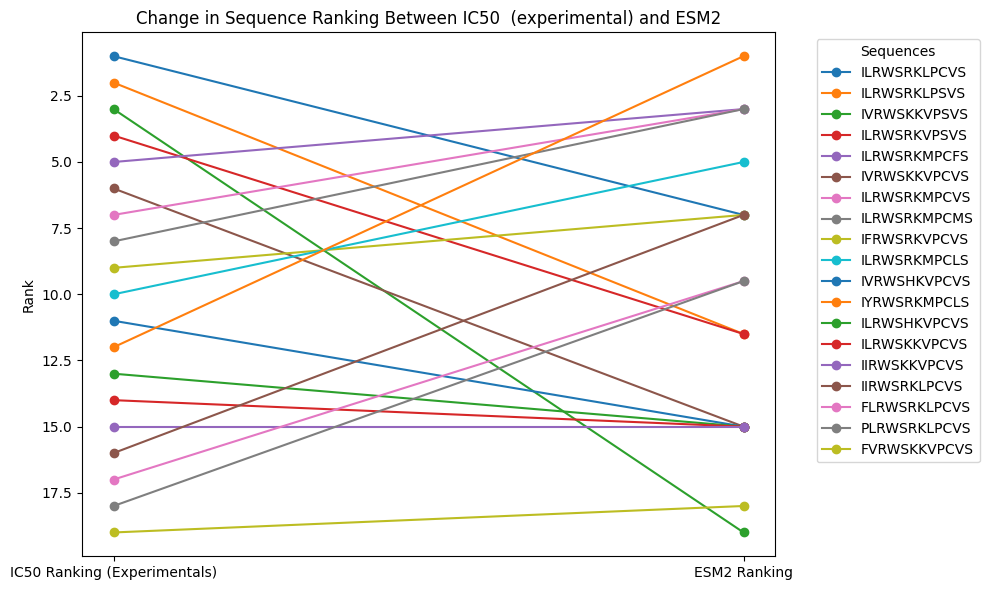

In [14]:
db['ESM2_Rank'] = db['ESM2_ppi_score_overall'].rank(ascending=True) 
db['IC50_Rank'] = db['IC50(nM)'].rank(ascending=True) 


plt.figure(figsize=(10, 6))
for _, row in db.iterrows():
    plt.plot([1, 2], [row['IC50_Rank'], row['ESM2_Rank']], '-o', label=row['Sequence'])

plt.xticks([1, 2], ['IC50 Ranking (Experimentals)', 'ESM2 Ranking'])
plt.gca().invert_yaxis()  # Invert y-axis so that lower ranks appear higher
plt.ylabel('Rank')
plt.title('Change in Sequence Ranking Between IC50  (experimental) and ESM2')
plt.legend(title="Sequences", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import ndcg_score
print("IC50",db["IC50_Rank"].values)
print("ESM2",db['ESM2_ppi_score_overall'].values)
ndcg_score([db["IC50_Rank"].values], [db["ESM2_ppi_score_overall"].values])

IC50 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19.]
ESM2 [15.72636223 15.74111938 15.7741642  15.74111938 15.70905972 15.74756336
 15.70905972 15.70905972 15.72636223 15.71026421 15.74756336 15.66595554
 15.74756336 15.74756336 15.74756336 15.72636223 15.73022175 15.73022175
 15.74862194]


0.8160984152532357

In [17]:
ndcg_score([db["IC50(nM)"].values], [db["ESM2_ppi_score_overall"].values])

0.656392785488844

In [18]:
from scipy.stats import kendalltau
print(db['IC50_Rank'].values.astype(int))
print(db['ESM2_Rank'].values.astype(int))
# Calculate Kendall's Tau
tau, p_value = kendalltau(db['IC50_Rank'].values.astype(int), db['ESM2_Rank'].values.astype(int))

print(f"Kendall's Tau: {tau:.2f}")
print(f"P-value: {p_value:.4f}")

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 7 11 19 11  3 15  3  3  7  5 15  1 15 15 15  7  9  9 18]
Kendall's Tau: 0.13
P-value: 0.4553


### peptides of length 10

In [30]:
db=db_all[db_all['Sequence_Length']==10]
db = db.sort_values(by='IC50(nM)')
db=db.reset_index(drop=True)
db

,PDB_NAME,Sequence,IC50(nM),PRODIGY,DFIRE,CP_PIE,Kdeep,RF-Score,PPI-Affiniy,Sequence_Length
0,408-417,LVRYTKKVPQ,1103.0,-7.1,-23.5,1.0,-11.6,-9.8,-7.8,10
1,JM#127,ILKQSRKAPL,10000.0,-6.7,-20.9,0.9,-10.2,-9.6,-7.9,10
2,JM#128,ILRTSRFISS,10000.0,-8.2,-20.3,1.0,-10.4,-9.7,-7.5,10
3,JM#130,IVRWSPPCVS,10000.0,-7.4,-23.5,0.7,-10.0,-9.8,-7.9,10
4,JM#132,IVRKKVPCPS,10000.0,-6.9,-20.1,0.9,-10.8,-9.7,-8.3,10
5,JM#135,IVRSSRKVVS,10000.0,-7.4,-19.9,1.0,-11.3,-9.7,-8.0,10
6,JM#137,IVKNQRKVPV,10000.0,-7.5,-19.9,0.8,-10.6,-9.7,-8.3,10
7,JM#138,VVRNSKAAFH,10000.0,-7.4,-20.5,1.0,-9.9,-9.6,-8.1,10
8,JM#152,CLKLPGGSCM,10000.0,-6.3,-15.1,0.5,-7.6,-9.4,-8.2,10
9,JM#154,NIRVGGTGMF,10000.0,-7.2,-16.7,0.9,-9.0,-9.5,-7.6,10


In [31]:
db['ESM2_initialLoss'] = db['Sequence'].apply(lambda peptide: compute_mlm_overall_withoutTheMaskedPos(CXCR4, peptide, [], []))
min_index = db['ESM2_initialLoss'].idxmin()
reference_peptide = db.loc[min_index, 'Sequence']
reference_peptide

'LVRYTKKVPQ'

LVRYTKKVPQ LVRYTKKVPQ []
LVRYTKKVPQ ILKQSRKAPL [0 1 2 3 4 5 7 9]
LVRYTKKVPQ ILRTSRFISS [0 1 3 4 5 6 7 8 9]
LVRYTKKVPQ IVRWSPPCVS [0 3 4 5 6 7 8 9]
LVRYTKKVPQ IVRKKVPCPS [0 3 4 5 6 7 9]
LVRYTKKVPQ IVRSSRKVVS [0 3 4 5 8 9]
LVRYTKKVPQ IVKNQRKVPV [0 2 3 4 5 9]
LVRYTKKVPQ VVRNSKAAFH [0 3 4 6 7 8 9]
LVRYTKKVPQ CLKLPGGSCM [0 1 2 3 4 5 6 7 8 9]
LVRYTKKVPQ NIRVGGTGMF [0 1 3 4 5 6 7 8 9]
LVRYTKKVPQ MRRAPAFLSA [0 1 3 4 5 6 7 8 9]
LVRYTKKVPQ GKHVPRAVFV [0 1 2 3 4 5 6 8 9]


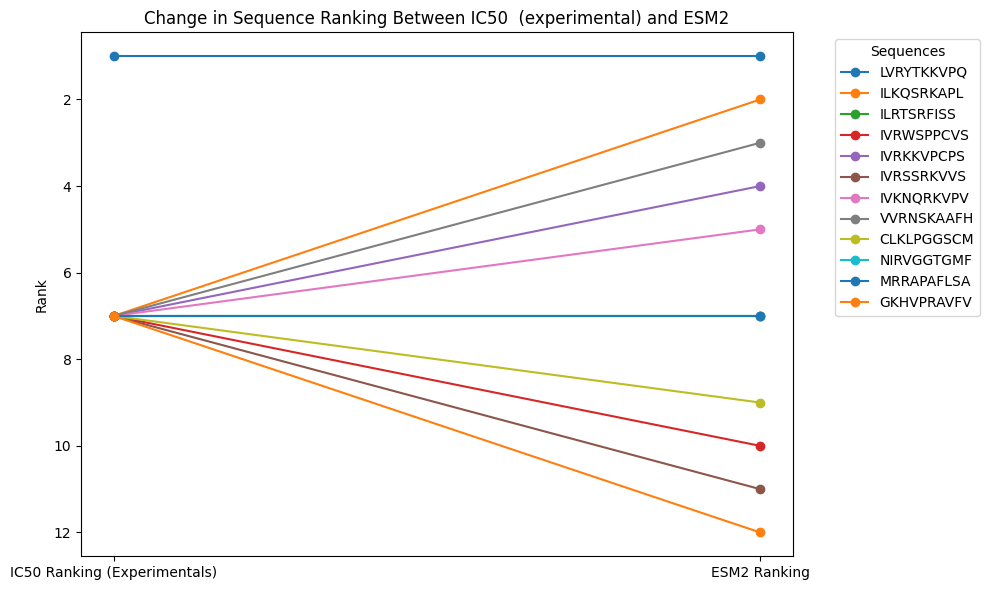

In [32]:
db['ESM2_ppi_score_overall'] = db.apply(compute_results, axis=1)

db['ESM2_Rank'] = db['ESM2_ppi_score_overall'].rank(ascending=True) 
db['IC50_Rank'] = db['IC50(nM)'].rank(ascending=True) 


plt.figure(figsize=(10, 6))
for _, row in db.iterrows():
    plt.plot([1, 2], [row['IC50_Rank'], row['ESM2_Rank']], '-o', label=row['Sequence'])

plt.xticks([1, 2], ['IC50 Ranking (Experimentals)', 'ESM2 Ranking'])
plt.gca().invert_yaxis()  # Invert y-axis so that lower ranks appear higher
plt.ylabel('Rank')
plt.title('Change in Sequence Ranking Between IC50  (experimental) and ESM2')
plt.legend(title="Sequences", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
ndcg_score([db["IC50(nM)"].values], [db["ESM2_ppi_score_overall"].values])

0.9999999999999997

In [34]:
from scipy.stats import kendalltau
print(db['IC50_Rank'].values.astype(int))
print(db['ESM2_Rank'].values.astype(int))
# Calculate Kendall's Tau
tau, p_value = kendalltau(db['IC50_Rank'].values.astype(int), db['ESM2_Rank'].values.astype(int))

print(f"Kendall's Tau: {tau:.2f}")
print(f"P-value: {p_value:.4f}")

[1 7 7 7 7 7 7 7 7 7 7 7]
[ 1  2  7 10  4 11  5  3  9  7  7 12]
Kendall's Tau: 0.42
P-value: 0.1086


### peptides of length 11

In [35]:
db=db_all[db_all['Sequence_Length']==11]
db = db.sort_values(by='IC50(nM)')
db=db.reset_index(drop=True)
db

,PDB_NAME,Sequence,IC50(nM),PRODIGY,DFIRE,CP_PIE,Kdeep,RF-Score,PPI-Affiniy,Sequence_Length
0,408-418,LVRYTKKVPQV,1364.0,-7.0,-24.4,1.1,-12.6,-9.7,-7.7,11
1,JM#123,ILKSSKLPCLS,10000.0,-7.6,-20.6,0.8,-9.2,-9.6,-8.1,11
2,JM#129,IVRSRKGGTVS,10000.0,-7.6,-19.3,1.0,-10.7,-9.6,-8.0,11
3,JM#131,IVKSKKAPCVS,10000.0,-7.8,-18.9,0.7,-8.9,-9.7,-8.3,11
4,JM#134,IVKSHKAPCVS,10000.0,-7.3,-19.3,0.7,-9.0,-9.7,-8.3,11
5,JM#136,IARSKRGPCAN,10000.0,-7.5,-18.8,0.9,-11.3,-9.7,-8.4,11
6,JM#155,QKVVAGVANAL,10000.0,-8.4,-13.0,0.4,-7.8,-9.4,-8.4,11
7,JM#162,SKSGRLLLAGY,10000.0,-7.7,-15.2,0.6,-11.0,-9.6,-7.8,11


In [36]:
db['ESM2_initialLoss'] = db['Sequence'].apply(lambda peptide: compute_mlm_overall_withoutTheMaskedPos(CXCR4, peptide, [], []))
min_index = db['ESM2_initialLoss'].idxmin()
reference_peptide = db.loc[min_index, 'Sequence']
reference_peptide

'LVRYTKKVPQV'

LVRYTKKVPQV LVRYTKKVPQV []
LVRYTKKVPQV ILKSSKLPCLS [ 0  1  2  3  4  6  7  8  9 10]
LVRYTKKVPQV IVRSRKGGTVS [ 0  3  4  6  7  8  9 10]
LVRYTKKVPQV IVKSKKAPCVS [ 0  2  3  4  6  7  8  9 10]
LVRYTKKVPQV IVKSHKAPCVS [ 0  2  3  4  6  7  8  9 10]
LVRYTKKVPQV IARSKRGPCAN [ 0  1  3  4  5  6  7  8  9 10]
LVRYTKKVPQV QKVVAGVANAL [ 0  1  2  3  4  5  6  7  8  9 10]
LVRYTKKVPQV SKSGRLLLAGY [ 0  1  2  3  4  5  6  7  8  9 10]


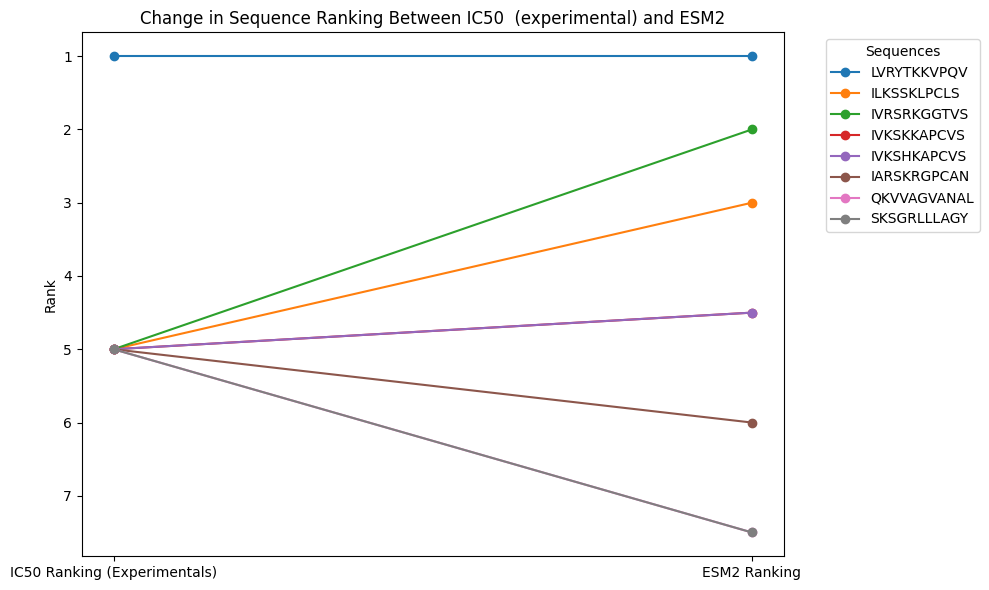

In [37]:
db['ESM2_ppi_score_overall'] = db.apply(compute_results, axis=1)

db['ESM2_Rank'] = db['ESM2_ppi_score_overall'].rank(ascending=True) 
db['IC50_Rank'] = db['IC50(nM)'].rank(ascending=True) 


plt.figure(figsize=(10, 6))
for _, row in db.iterrows():
    plt.plot([1, 2], [row['IC50_Rank'], row['ESM2_Rank']], '-o', label=row['Sequence'])

plt.xticks([1, 2], ['IC50 Ranking (Experimentals)', 'ESM2 Ranking'])
plt.gca().invert_yaxis()  # Invert y-axis so that lower ranks appear higher
plt.ylabel('Rank')
plt.title('Change in Sequence Ranking Between IC50  (experimental) and ESM2')
plt.legend(title="Sequences", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
ndcg_score([db["IC50(nM)"].values], [db["ESM2_ppi_score_overall"].values])

1.0

In [39]:
from scipy.stats import kendalltau
print(db['IC50_Rank'].values.astype(int))
print(db['ESM2_Rank'].values.astype(int))
# Calculate Kendall's Tau
tau, p_value = kendalltau(db['IC50_Rank'].values.astype(int), db['ESM2_Rank'].values.astype(int))

print(f"Kendall's Tau: {tau:.2f}")
print(f"P-value: {p_value:.4f}")

[1 5 5 5 5 5 5 5]
[1 3 2 4 4 6 7 7]
Kendall's Tau: 0.52
P-value: 0.1221


### peptides of length 9

In [40]:
db=db_all[db_all['Sequence_Length']==9]
db = db.sort_values(by='IC50(nM)')
db=db.reset_index(drop=True)
db

,PDB_NAME,Sequence,IC50(nM),PRODIGY,DFIRE,CP_PIE,Kdeep,RF-Score,PPI-Affiniy,Sequence_Length
0,JM#133,IVRWSKYVS,1584.0,-6.8,-24.0,0.9,-10.8,-9.7,-7.3,9
1,JM#125,ILRHSRGPS,10000.0,-7.0,-20.2,0.9,-9.9,-9.6,-8.1,9
2,JM#126,IPKWSRGVS,10000.0,-6.9,-19.8,0.7,-9.3,-9.7,-7.6,9
3,JM#153,CLRLPGGSC,10000.0,-5.9,-20.2,1.0,-9.3,-9.6,-7.6,9
4,JM#156,SRVLNLGPI,10000.0,-7.5,-15.6,0.6,-9.6,-9.4,-7.4,9
5,JM#158,AGRGKLIAV,10000.0,-5.8,-14.0,0.8,-9.2,-9.1,-7.9,9
6,JM#160,SRDKALLRL,10000.0,-7.8,-14.4,0.7,-12.1,-9.5,-7.4,9


In [41]:
db['ESM2_initialLoss'] = db['Sequence'].apply(lambda peptide: compute_mlm_overall_withoutTheMaskedPos(CXCR4, peptide, [], []))
min_index = db['ESM2_initialLoss'].idxmin()
reference_peptide = db.loc[min_index, 'Sequence']
reference_peptide

'CLRLPGGSC'

CLRLPGGSC IVRWSKYVS [0 1 3 4 5 6 7 8]
CLRLPGGSC ILRHSRGPS [0 3 4 5 7 8]
CLRLPGGSC IPKWSRGVS [0 1 2 3 4 5 7 8]
CLRLPGGSC CLRLPGGSC []
CLRLPGGSC SRVLNLGPI [0 1 2 4 5 7 8]
CLRLPGGSC AGRGKLIAV [0 1 3 4 5 6 7 8]
CLRLPGGSC SRDKALLRL [0 1 2 3 4 5 6 7 8]


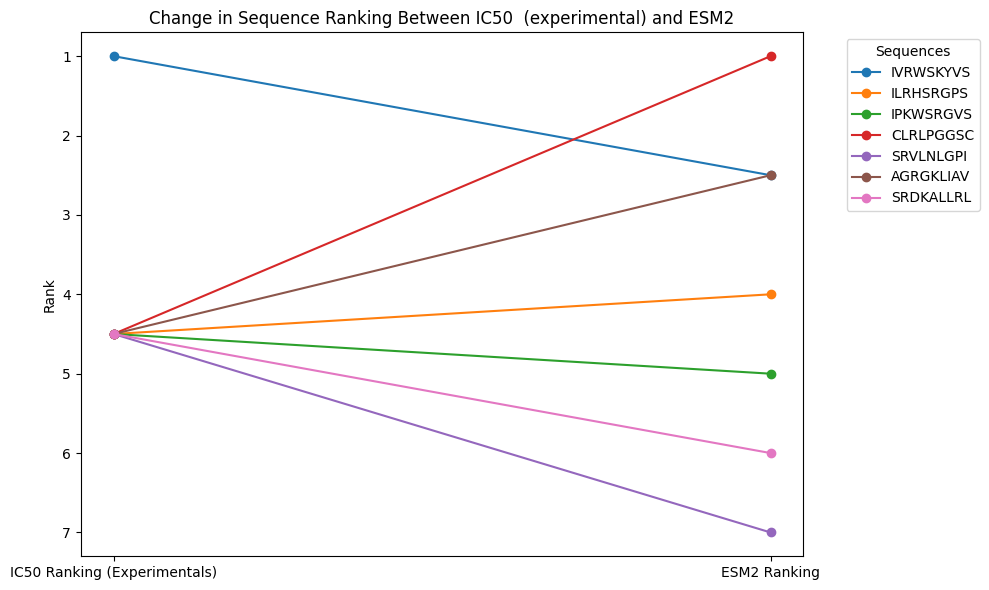

In [42]:
db['ESM2_ppi_score_overall'] = db.apply(compute_results, axis=1)

db['ESM2_Rank'] = db['ESM2_ppi_score_overall'].rank(ascending=True) 
db['IC50_Rank'] = db['IC50(nM)'].rank(ascending=True) 


plt.figure(figsize=(10, 6))
for _, row in db.iterrows():
    plt.plot([1, 2], [row['IC50_Rank'], row['ESM2_Rank']], '-o', label=row['Sequence'])

plt.xticks([1, 2], ['IC50 Ranking (Experimentals)', 'ESM2 Ranking'])
plt.gca().invert_yaxis()  # Invert y-axis so that lower ranks appear higher
plt.ylabel('Rank')
plt.title('Change in Sequence Ranking Between IC50  (experimental) and ESM2')
plt.legend(title="Sequences", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [43]:
ndcg_score([db["IC50(nM)"].values], [db["ESM2_ppi_score_overall"].values])

0.9904254251997433

In [44]:
from scipy.stats import kendalltau
print(db['IC50_Rank'].values.astype(int))
print(db['ESM2_Rank'].values.astype(int))
# Calculate Kendall's Tau
tau, p_value = kendalltau(db['IC50_Rank'].values.astype(int), db['ESM2_Rank'].values.astype(int))

print(f"Kendall's Tau: {tau:.2f}")
print(f"P-value: {p_value:.4f}")

[1 4 4 4 4 4 4]
[2 4 5 1 7 2 6]
Kendall's Tau: 0.27
P-value: 0.4492


### peptides of length 16

In [45]:
db=db_all[db_all['Sequence_Length']==16]
db = db.sort_values(by='IC50(nM)')
db=db.reset_index(drop=True)
db

,PDB_NAME,Sequence,IC50(nM),PRODIGY,DFIRE,CP_PIE,Kdeep,RF-Score,PPI-Affiniy,Sequence_Length
0,EPIX4,LVRYTKKVPQVSTPTL,3709.0,-8.8,-28.0,1.0,-16.9,-10.0,-8.0,16
1,JM#94,LIRYTKKVPQVSTPTL,6623.0,-8.7,-29.4,1.2,-12.9,-10.0,-7.9,16
2,JM#92,FVRYTKKVPQVSTPTL,10000.0,-9.0,-29.3,1.1,-12.0,-10.0,-8.0,16
3,JM#93,PVRYTKKVPQVSTPTL,10000.0,-9.1,-25.3,1.0,-17.8,-10.0,-8.2,16


In [46]:
db['ESM2_initialLoss'] = db['Sequence'].apply(lambda peptide: compute_mlm_overall_withoutTheMaskedPos(CXCR4, peptide, [], []))
min_index = db['ESM2_initialLoss'].idxmin()
reference_peptide = db.loc[min_index, 'Sequence']
reference_peptide

'PVRYTKKVPQVSTPTL'

PVRYTKKVPQVSTPTL LVRYTKKVPQVSTPTL [0]
PVRYTKKVPQVSTPTL LIRYTKKVPQVSTPTL [0 1]
PVRYTKKVPQVSTPTL FVRYTKKVPQVSTPTL [0]
PVRYTKKVPQVSTPTL PVRYTKKVPQVSTPTL []


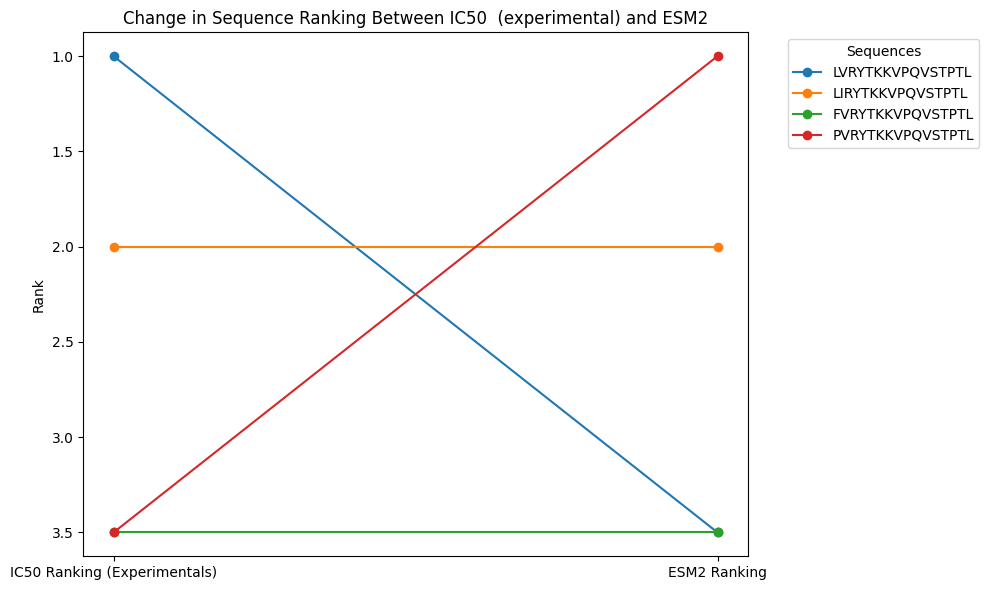

In [47]:
db['ESM2_ppi_score_overall'] = db.apply(compute_results, axis=1)

db['ESM2_Rank'] = db['ESM2_ppi_score_overall'].rank(ascending=True) 
db['IC50_Rank'] = db['IC50(nM)'].rank(ascending=True) 


plt.figure(figsize=(10, 6))
for _, row in db.iterrows():
    plt.plot([1, 2], [row['IC50_Rank'], row['ESM2_Rank']], '-o', label=row['Sequence'])

plt.xticks([1, 2], ['IC50 Ranking (Experimentals)', 'ESM2 Ranking'])
plt.gca().invert_yaxis()  # Invert y-axis so that lower ranks appear higher
plt.ylabel('Rank')
plt.title('Change in Sequence Ranking Between IC50  (experimental) and ESM2')
plt.legend(title="Sequences", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
ndcg_score([db["IC50(nM)"].values], [db["ESM2_ppi_score_overall"].values])

0.8859136991074479

In [49]:
from scipy.stats import kendalltau
print(db['IC50_Rank'].values.astype(int))
print(db['ESM2_Rank'].values.astype(int))
# Calculate Kendall's Tau
tau, p_value = kendalltau(db['IC50_Rank'].values.astype(int), db['ESM2_Rank'].values.astype(int))

print(f"Kendall's Tau: {tau:.2f}")
print(f"P-value: {p_value:.4f}")

[1 2 3 3]
[3 2 3 1]
Kendall's Tau: -0.40
P-value: 0.4442
